Excel is a popular and powerful spreadsheet application for Windows. The 'openpyxl' module allows your Python programs to read and modify Excel spreadsheet files. For example, you might have the boring task of copying certain data from one spreadsheet and pasting it into another one. Or you might have to go through thousands of rows and pick out just a handful of them to make small edits based on some criteria. Or you might have to look through hundreds of spreadsheets of department budgets, searching for any that are in the red. These are exactly the sort of boring, mindless spreadsheet tasks that Python can do for you.

Although Excel is proprietary software from Microsoft, there are free alternatives that run on Windows, OS X, and Linux. Both LibreOffice Calc and OpenOffice Calc work with Excel's '.xlsx' file format for spreadsheets, which means the 'openpyxl' module can work on spreadsheets from these applications as well. You can download the software from https://www.libreoffice.org/ and http://www.openoffice.org/ respectively. Even if you already have Excel installed on your computer, you may find these programs easier to use. The screenshots in this chapter, however, are all from Excel 2010 on Windows 7.

In [2]:
import os, datetime
import openpyxl

First, let’s go over some basic definitions: An Excel spreadsheet document is called a workbook. A single workbook is saved in a file with the ".xlsx" extension (2010 version). Each workbook can contain multiple sheets (also called worksheets). The sheet the user is currently viewing (or last viewed before closing Excel) is called the active sheet. Each sheet has columns (addressed by letters starting at 'A') and rows (addressed by numbers starting at '1'). A box at a particular column and row is called a cell. Each cell can contain a number or text value. The grid of cells with data makes up a sheet.

This chapter covers version 2.3.3 of 'OpenPyXL', but new versions are regularly released by the 'OpenPyXL' team. Don’t worry, though: new versions should stay backward compatible with the instructions in this book for quite some time. If you have a newer version and want to see what additional features may be available to you, you can check out the full documentation for 'OpenPyXL' at http://openpyxl.readthedocs.org/. 

The examples in this chapter will use a spreadsheet named "example.xlsx" stored in the root folder. You can either create the spreadsheet yourself or download it from http://nostarch.com/automatestuff/. 

In [3]:
os.chdir("C:\\Users\\GAO\\Anaconda\\Gao_Jupyter_Notebook_Python_Codes\\Automate the Boring Stuff with Python\\Datasets and Files")
wb = openpyxl.load_workbook('example.xlsx')
type(wb) # this is a 'Workbook' object

openpyxl.workbook.workbook.Workbook

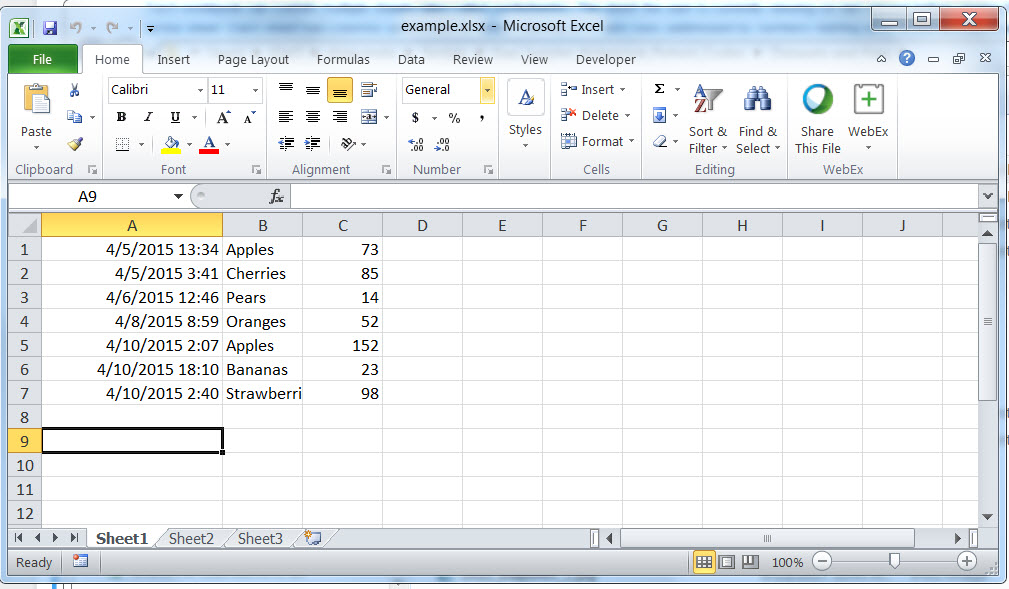

In [3]:
from IPython.display import Image
Image("ch12_snapshot_1.jpg") 

The openpyxl.load_workbook() function takes in the filename and returns a value of the workbook data type. This 'Workbook' object represents the Excel file, a bit like how a 'File' object represents an opened text file.

You can also get a list of all the sheet names in the workbook by calling the get_sheet_names() method. Each sheet is represented by a 'Worksheet' object, which you can obtain by passing the sheet name string to the get_sheet_by_name() workbook method. Finally, you can read the active member variable of a 'Workbook' object to get the workbook’s active sheet. The active sheet is the sheet that’s on top when the workbook is opened in Excel. Once you have the 'Worksheet' object, you can get its name from the 'title' attribute. 

In [4]:
print('All the sheets involved in this object: ', wb.get_sheet_names()) 

All the sheets involved in this object:  ['Sheet1', 'Sheet2', 'Sheet3']


In [5]:
sheet = wb.get_sheet_by_name('Sheet1')
print(type(sheet))
print(sheet.title)
print(sheet['A1'])

<class 'openpyxl.worksheet.worksheet.Worksheet'>
Sheet1
<Cell Sheet1.A1>


The 'Cell' object has a 'value' attribute that contains the value stored in that cell. 'Cell' objects also have 'row', 'column', and 'coordinate' attributes that provide location information for the cell. Below are some examples:

In [6]:
print(sheet['A1'].value) # the value of the cell 'A1' on 'sheet'
print("This is the same as:", datetime.datetime(2015, 4, 5, 13, 34, 2), '\n')
c = sheet['B1']
print('The value of cell B1 is:', c.value)
print('Row ' + str(c.row) + ', Column ' + c.column + ' is ' + c.value)
print('Cell ' + c.coordinate + ' is ' + c.value)

2015-04-05 13:34:02
This is the same as: 2015-04-05 13:34:02 

The value of cell B1 is: Apples
Row 1, Column B is Apples
Cell B1 is Apples


In the above example, accessing the 'value' attribute of our 'Cell' object for cell B1 gives us the string 'Apples'. The 'row' attribute gives us the integer 1, the 'column' attribute gives us 'B', and the 'coordinate' attribute gives us 'B1'. Also notice that 'OpenPyXL' will automatically interpret the dates in column A and return them as datetime values rather than strings.

Specifying a column by letter can be tricky to program, especially because after column Z, the columns start by using two letters: AA, AB, AC, and so on. As an alternative, you can also get a cell using the sheet’s cell() method and passing integers for its row and column keyword arguments. The first row or column integer is 1, not 0. 

In [7]:
print(sheet.cell(row=1, column=2))
print(sheet.cell(row=1, column=2).value)

<Cell Sheet1.B1>
Apples


In [8]:
for i in range(1, 8):
    print(i, sheet.cell(row=i, column=2).value)

1 Apples
2 Cherries
3 Pears
4 Oranges
5 Apples
6 Bananas
7 Strawberries


You can determine the size of the sheet with the 'Worksheet' object’s 'max_row' and 'max_column' member variables:

In [9]:
sheet = wb.get_sheet_by_name('Sheet1')
print('maximum number of rows on this worksheet:', sheet.max_row)
print('maximum number of columns on this worksheet:', sheet.max_column)

maximum number of rows on this worksheet: 7
maximum number of columns on this worksheet: 3


To convert from letters to numbers, call the openpyxl.utils.column_index_from_string() function. To convert from numbers to letters, call the openpyxl.utils.get_column_letter() function. After you import these two functions from the "openpyxl.utils" module, you can call the function get_column_letter() and pass it an integer to figure out what the letter name of the column is. Below are examples:

In [10]:
from openpyxl.utils import get_column_letter, column_index_from_string
print(get_column_letter(1)) # the first column on the worksheet is indexed by 'A'
print(get_column_letter(2)) # the second column on the worksheet is indexed by 'B'
print(get_column_letter(27)) # the 27th column on the worksheet is indexed by 'AA'
print(get_column_letter(900)) # the 900th column on the worksheet is indexed by 'AHP'
print(column_index_from_string('AB')) # The column 'AB' on the workbook is the the 28th column couting from the left
print(column_index_from_string('D')) # The column 'D' on the workbook is the the 4th column couting from the left

A
B
AA
AHP
28
4


Now let's do more fancy indexing. You can slice 'Worksheet' objects to get all the 'Cell' objects in a row, column, or rectangular area of the spreadsheet. Then you can loop over all the cells in the slice:

In [11]:
wb = openpyxl.load_workbook('example.xlsx')
sheet = wb.get_sheet_by_name('Sheet1')
print(tuple(sheet['A1':'C3']), "\n")
for rowOfCellObjects in sheet['A1':'C3']:
    for cellObj in rowOfCellObjects:
        print(cellObj.coordinate, cellObj.value)
    print('--- END OF ROW ---', "\n")

((<Cell Sheet1.A1>, <Cell Sheet1.B1>, <Cell Sheet1.C1>), (<Cell Sheet1.A2>, <Cell Sheet1.B2>, <Cell Sheet1.C2>), (<Cell Sheet1.A3>, <Cell Sheet1.B3>, <Cell Sheet1.C3>)) 

A1 2015-04-05 13:34:02
B1 Apples
C1 73
--- END OF ROW --- 

A2 2015-04-05 03:41:23
B2 Cherries
C2 85
--- END OF ROW --- 

A3 2015-04-06 12:46:51
B3 Pears
C3 14
--- END OF ROW --- 



Here, in the example above, we specify that we want the 'Cell' objects in the rectangular area from A1 to C3, and we get a 'Generator' object containing the 'Cell' objects in that area. To help us visualize this 'Generator' object, we can use tuple() on it to display its 'Cell' objects in a tuple. This tuple contains three tuples: one for each row, from the top of the desired area to the bottom. Each of these three inner tuples contains the 'Cell' objects in one row of our desired area, from the leftmost cell to the right. So overall, our slice of the sheet contains all the 'Cell' objects in the area from A1 to C3, starting from the top-left cell and ending with the bottom-right cell.

Using loops, we can print values of particular rows and columns:

In [12]:
newsheet = list(wb.active)
print('newsheet:\n', newsheet, '\n')

newsheet:
 [(<Cell Sheet1.A1>, <Cell Sheet1.B1>, <Cell Sheet1.C1>), (<Cell Sheet1.A2>, <Cell Sheet1.B2>, <Cell Sheet1.C2>), (<Cell Sheet1.A3>, <Cell Sheet1.B3>, <Cell Sheet1.C3>), (<Cell Sheet1.A4>, <Cell Sheet1.B4>, <Cell Sheet1.C4>), (<Cell Sheet1.A5>, <Cell Sheet1.B5>, <Cell Sheet1.C5>), (<Cell Sheet1.A6>, <Cell Sheet1.B6>, <Cell Sheet1.C6>), (<Cell Sheet1.A7>, <Cell Sheet1.B7>, <Cell Sheet1.C7>)] 



In [13]:
l1=list(newsheet[0])
print('first row:\n', l1, '\n')
for cellObj in l1:
        print(cellObj.value) # printing the first row of the data
print('\n')
l2=list(newsheet[1])
print('second row:\n', l2, '\n')
for cellObj in l2:
        print(cellObj.value) # printing the second row of the data

first row:
 [<Cell Sheet1.A1>, <Cell Sheet1.B1>, <Cell Sheet1.C1>] 

2015-04-05 13:34:02
Apples
73


second row:
 [<Cell Sheet1.A2>, <Cell Sheet1.B2>, <Cell Sheet1.C2>] 

2015-04-05 03:41:23
Cherries
85


In [14]:
l3 = [item[0] for item in newsheet]
print('first column:\n', l3, '\n')
for cellObj in l3:
        print(cellObj.value) # printing the first row of the data
print('\n')
l4 = [item[1] for item in newsheet]
print('second column:\n', l4, '\n')
for cellObj in l4:
        print(cellObj.value) # printing the first row of the data

first column:
 [<Cell Sheet1.A1>, <Cell Sheet1.A2>, <Cell Sheet1.A3>, <Cell Sheet1.A4>, <Cell Sheet1.A5>, <Cell Sheet1.A6>, <Cell Sheet1.A7>] 

2015-04-05 13:34:02
2015-04-05 03:41:23
2015-04-06 12:46:51
2015-04-08 08:59:43
2015-04-10 02:07:00
2015-04-10 18:10:37
2015-04-10 02:40:46


second column:
 [<Cell Sheet1.B1>, <Cell Sheet1.B2>, <Cell Sheet1.B3>, <Cell Sheet1.B4>, <Cell Sheet1.B5>, <Cell Sheet1.B6>, <Cell Sheet1.B7>] 

Apples
Cherries
Pears
Oranges
Apples
Bananas
Strawberries


We now quickly go over a small project. Say you have a spreadsheet of data from the 2010 US Census and you have the boring task of going through its thousands of rows to count both the total population and the number of Census tracts for each county (a Census tract is simply a geographic area defined for the purposes of the census). Each row represents a single Census tract. We’ll name the spreadsheet file 'censuspopdata.xlsx', and the file can be downloaded from http://nostarch.com/automatestuff/. In this project, we’ll write a script that can read from the Census spreadsheet file and calculate statistics for each county in a matter of seconds. Specifically, we want to count the number of census tracts in each county and counts the total population of each county, and then finally prints out the results.

There is just one sheet in the 'censuspopdata.xlsx' spreadsheet, named 'Population by Census Tract', and each row holds the data for a single Census tract. The columns are the tract number (A), the state abbreviation (B), the county name (C), and the population of the tract (D). The codes are printed below:

In [15]:
import openpyxl, pprint
print('Opening workbook...')
wb = openpyxl.load_workbook('censuspopdata.xlsx')
sheet = wb.get_sheet_by_name('Population by Census Tract')

countyData = {} # creating an empty dictionary
for row in range(2, sheet.max_row + 1): # each row in the spreadsheet has data for one Census tract
    state  = sheet['B' + str(row)].value
    county = sheet['C' + str(row)].value
    pop    = sheet['D' + str(row)].value
    countyData.setdefault(state, {}) # make sure the key for this state exists
    countyData[state].setdefault(county, {'tracts': 0, 'pop': 0}) # make sure the key for this county in this state exists 
    countyData[state][county]['tracts'] += 1 # each row represents one census tract (so increment by one)
    countyData[state][county]['pop'] += int(pop) # increase the county population by the population in this census tract

print('Reading rows...')
for row in range(2, sheet.max_row + 1):
    # each row in the spreadsheet has data for one census tract
    state = sheet['B' + str(row)].value
    county = sheet['C' + str(row)].value
    pop = sheet['D' + str(row)].value

print('Writing results...')
resultFile = open('census2010.txt', 'w')
resultFile.write('allData = ' + pprint.pformat(countyData))
resultFile.close()
print('Done.')

Opening workbook...
Reading rows...
Writing results...
Done.


Now let's go over the program from above. This code imports the 'openpyxl' module, as well as the pprint module that you’ll use to print the final county data. Then it opens the censuspopdata.xlsx file, gets the sheet with the Census data, and begins iterating over its rows. Note that you’ve also created a variable named 'countyData', which will contain the populations and number of tracts you calculate for each county. 

The data structure stored in the dictionary 'countyData' will be a dictionary with state abbreviations as its keys. Each state abbreviation will map to another dictionary, whose keys are strings of the county names in that state. Each county name will in turn map to a dictionary with just two keys, 'tracts' and 'pop'. These keys map to the number of census tracts and population for the county.

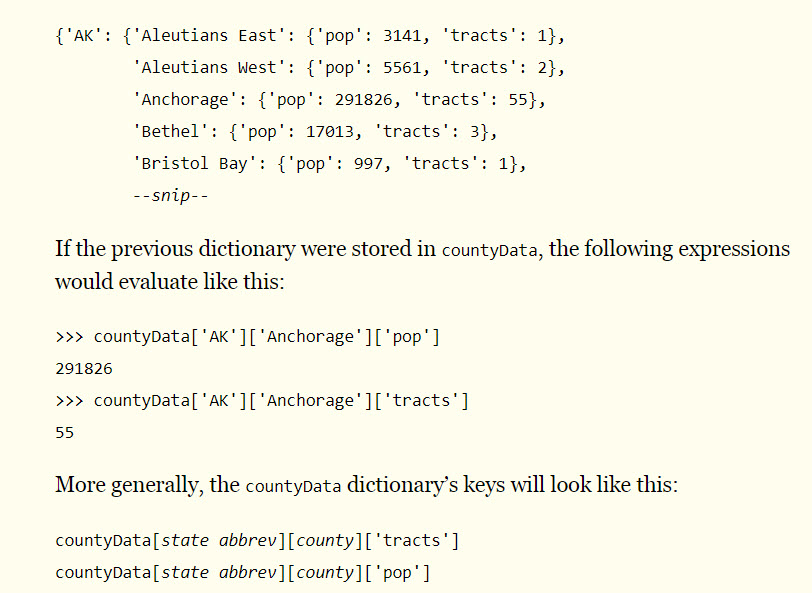

In [16]:
from IPython.display import Image
Image("ch12_snapshot_2.jpg") 

We now move on to the next topic. The module 'OpenPyXL' also provides ways of writing data, meaning that your programs can create and edit spreadsheet files. With Python, it’s simple to create spreadsheets with thousands of rows of data.

We now start our discussion with creating a brandnew Excel document. The workbook will start off with a single sheet named 'Sheet'. We can change the name of the sheet by storing a new string in its 'title' attribute.

Any time you modify the 'Workbook' object or its sheets and cells, the spreadsheet file will not be saved until you call the save() method:

In [17]:
wb = openpyxl.Workbook() # creating a blank worksheet for an Excel
print(wb.get_sheet_names()) # ['Sheet']
sheet = wb.active
print(sheet.title) # 'Sheet'
sheet.title = 'New Sheet Created'
print(wb.get_sheet_names()) # ['Spam Bacon Eggs Sheet']
wb.save('example_copy1.xlsx')

['Sheet']
Sheet
['New Sheet Created']


In [18]:
wb = openpyxl.load_workbook('example.xlsx')
sheet = wb.active
sheet.title = 'New Sheet'
wb.save('example_copy2.xlsx')

Here in the example above, we change the name of our sheet. To save our changes, we pass a filename as a string to the save() method. Passing a different filename than the original, such as 'example_copy1.xlsx', saves the changes to a copy of the spreadsheet.

Whenever you edit a spreadsheet you've loaded from a file, you should always save the new, edited spreadsheet to a different filename than the original. That way, you’ll still have the original spreadsheet file to work with in case a bug in your code caused the new, saved file to have incorrect or corrupt data.

Sheets can be added to and removed from a workbook with the create_sheet() and remove_sheet() methods. Below is an example. Notice that the remove_sheet() method takes a 'Worksheet' object, not a string of the sheet name, as its argument. If you know only the name of a sheet you want to remove, call get_sheet_by_name() and pass its return value into remove_sheet().

In [19]:
wb = openpyxl.load_workbook('example.xlsx')
print('before creating the worksheet: ', wb.get_sheet_names())
wb.create_sheet() # by default, the created sheet is called 'Sheet'
print('after creating the worksheet: ', wb.get_sheet_names())
wb.create_sheet(index=0, title='First Sheet')
print('after adding the first sheet: ', wb.get_sheet_names())
wb.create_sheet(index=2, title='Middle Sheet')
print('after adding the second sheet: ', wb.get_sheet_names())
wb.remove_sheet(wb.get_sheet_by_name('Middle Sheet'))
print('after removing the middle sheet: ', wb.get_sheet_names())
wb.save('example_copy3.xlsx')

before creating the worksheet:  ['Sheet1', 'Sheet2', 'Sheet3']
after creating the worksheet:  ['Sheet1', 'Sheet2', 'Sheet3', 'Sheet']
after adding the first sheet:  ['First Sheet', 'Sheet1', 'Sheet2', 'Sheet3', 'Sheet']
after adding the second sheet:  ['First Sheet', 'Sheet1', 'Middle Sheet', 'Sheet2', 'Sheet3', 'Sheet']
after removing the middle sheet:  ['First Sheet', 'Sheet1', 'Sheet2', 'Sheet3', 'Sheet']


After learning manipulating sheet, we learn how to write values to the sheet. Writing values to cells is much like writing values to keys in a dictionary:

In [20]:
wb = openpyxl.load_workbook('example_copy3.xlsx')
sheet = wb.get_sheet_by_name('Sheet')
sheet.title='Active Tab' # renaming 'Sheet' to 'Active Tab'
sheet['A1'] = 'Hello world!'
sheet['A2'] = 'This is a brand new world!'
sheet['A3'] = 'You will finally be a data scientist!'
sheet['A4'] = 'Keep working hard!'
wb.remove_sheet(wb.get_sheet_by_name('Sheet2'))
wb.remove_sheet(wb.get_sheet_by_name('Sheet3'))
wb.save('example_copy3.xlsx')

We now start learning how to beautify and improve the actionability and visualization of our Excel output. We will specifically discuss using Python to control fonts, creating formulas, adjusting rows and columns, manipulating cells (merging and unmerging), freezing panes, and dealing with charts. 

We first discuss fonts. To set font style attributes, you can pass keyword arguments to Font(). Below is a table that shows some of the possible keyword arguments for the Font() function:

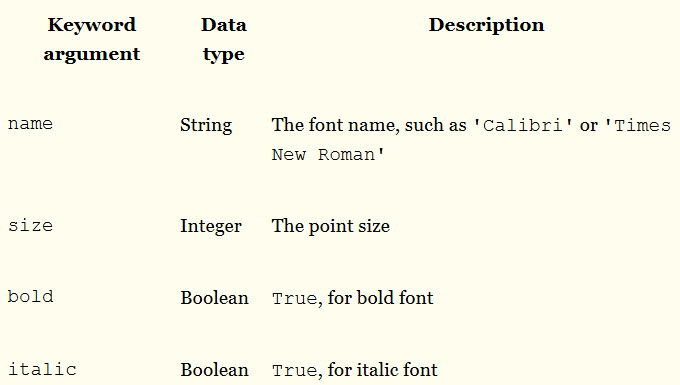

In [21]:
from IPython.display import Image
Image("ch12_snapshot_3.jpg") 

You can call Font() to create a 'Font' object and store that 'Font' object in a variable. You then pass that to the Style() function, store the resulting 'Style' object in a variable, and assign that variable to a 'Cell' object’s 'style' attribute. For example, this code creates various font styles:

In [22]:
import openpyxl
from openpyxl.styles import Font
wb = openpyxl.Workbook()
sheet = wb.create_sheet('Brand_New_Sheet')

fontObj1 = Font(name='Times New Roman', bold=True)
sheet['A1'].font = fontObj1
sheet['A1'] = 'Bold Times New Roman'

fontObj2 = Font(size=24, italic=True)
sheet['B3'].font = fontObj2
sheet['B3'] = '24 pt Italic'

wb.save('Excel styles examples.xlsx')

Secondly, we study formulas. Formulas, which begin with an equal sign, can configure cells to contain values calculated from other cells. We can use the 'openpyxl' module to programmatically add formulas to cells, just like any normal value.

In [23]:
wb = openpyxl.load_workbook('Excel styles examples.xlsx')
sheet = wb.get_sheet_by_name('Sheet')
sheet.title = 'Calculation_Sheet'
sheet['A1'] = 200
sheet['A2'] = 300
sheet['A3'] = '=SUM(A1:A2)'
wb.save('Excel styles examples.xlsx')

As you see from above, Excel formulas offer a level of programmability for spreadsheets but can quickly become unmanageable for complicated tasks. Python code is much more readable.

In Excel, adjusting the sizes of rows and columns is as easy as clicking and dragging the edges of a row or column header. But if you need to set a row or column’s size based on its cells’ contents or if you want to set sizes in a large number of spreadsheet files, it will be much quicker to write a Python program to do it.

Rows and columns can also be hidden entirely from view. Or they can be “frozen” in place so that they are always visible on the screen and appear on every page when the spreadsheet is printed (which is handy for headers). 'Worksheet' objects have 'row_dimensions' and 'column_dimensions' attributes that control row heights and column widths. Below is an example: 

In [24]:
wb = openpyxl.load_workbook('Excel styles examples.xlsx')
sheet = wb.create_sheet('Adjustment')
sheet['A1'] = 'Tall row'
sheet['B2'] = 'Wide column'
sheet.row_dimensions[1].height = 70
sheet.column_dimensions['B'].width = 20
wb.save('Excel styles examples.xlsx')

A sheet’s 'row_dimensions' and 'column_dimensions' are dictionary-like values; 'row_dimensions' contains' RowDimension' objects and 'column_dimensions' contains 'ColumnDimension' objects. In 'row_dimensions', you can access one of the objects using the number of the row (in this case, 1 or 2). In 'column_dimensions', you can access one of the objects using the letter of the column (in this case, A or B).

Once you have the 'RowDimension' object, you can set its height. Once you have the 'ColumnDimension' object, you can set its width. The row height can be set to an integer or float value between 0 and 409. This value represents the height measured in points, where one point equals 1/72 of an inch. The default row height is 12.75. The column width can be set to an integer or float value between 0 and 255. This value represents the number of characters at the default font size (11 point) that can be displayed in the cell. The default column width is 8.43 characters. Columns with widths of 0 or rows with heights of 0 are hidden from the user.

We now discuss merging and splitting cells. A rectangular area of cells can be merged into a single cell with the merge_cells() sheet method. The argument to merge_cells() is a single string of the top-left and bottom-right cells of the rectangular area to be merged. So for example, 'A1:D3' merges 12 cells into a single cell. To set the value of these merged cells, simply set the value of the top-left cell of the merged group. To unmerge cells, you can call the unmerge_cells() sheet method in a similar fashion (e.g. sheet.unmerge_cells('C5:D5')). Below is an example:

In [25]:
wb = openpyxl.load_workbook('Excel styles examples.xlsx')
sheet = wb.create_sheet('MergingCells')
sheet.merge_cells('A1:D3')
sheet['A1'] = 'Twelve cells merged together.'
sheet.merge_cells('C5:D5')
sheet['C5'] = 'Two merged cells.'
wb.save('Excel styles examples.xlsx')

For spreadsheets too large to be displayed all at once, it’s helpful to “freeze” a few of the top rows or leftmost columns onscreen. Frozen column or row headers, for example, are always visible to the user even as they scroll through the spreadsheet. In the 'openpyxl' module, each'Worksheet' object has a 'freeze_panes' attribute that can be set to a 'Cell' object or a string of a cell’s coordinates. Note that all rows above and all columns to the left of this cell will be frozen, but the row and column of the cell itself will not be frozen.

To unfreeze all panes, set freeze_panes to None or 'A1'. Now, the table below shows which rows and columns will be frozen for some example settings of 'freeze_panes':

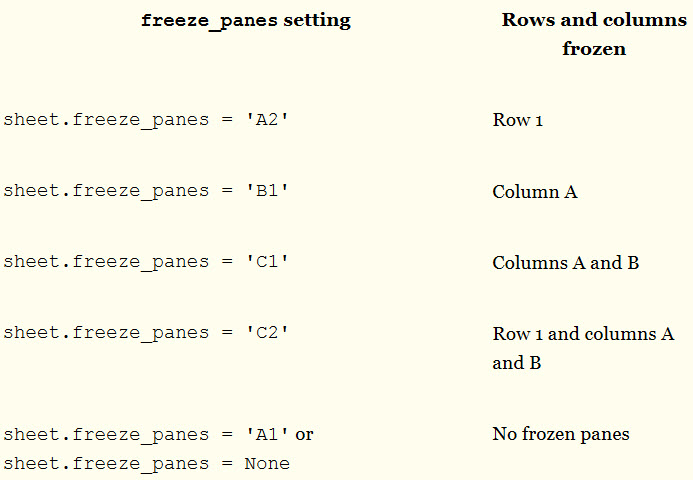

In [26]:
from IPython.display import Image
Image("ch12_snapshot_4.jpg") 

In [27]:
wb1 = openpyxl.load_workbook('produceSales.xlsx')
sheet = wb.active
sheet.freeze_panes = 'A2'
ws1 = wb1.worksheets[0] # the first sheet of wb1
ws1.title='Freezing'
print(ws1.title)

wb2 = openpyxl.load_workbook('Excel styles examples.xlsx')
ws2 = wb2.create_sheet(ws1.title)

for row in ws1:
    for cell in row:
        ws2[cell.coordinate].value = cell.value
wb2.save('Excel styles examples.xlsx')

Freezing


The above code does the following: 1) It opens the raw file called 'produceSales.xlsx', set the active sheet and name it 'Freezing' and freeze the pane (Row one) on this Excel sheet. 2) It opens up the destination excel file called 'Excel styles examples.xlsx' and create a new sheet using the name of the existing sheet from the other Excel file. Then the program copies (cell-by-cell) all values from the first Excel file to the new sheet in the second Excel file. Essentially, what the program does is to create a new tab on an existing Excel file and then copy all the information from another Excel file. 

Lastly, we talk about chart. The 'openpyxl' module supports creating bar, line, scatter, and pie charts using the data in a sheet’s cells. To make a chart, you need to do the following:
1. Create a 'Reference' object from a rectangular selection of cells.
2. Create a 'Series' object by passing in the Reference object.
3. Create a 'Char't object.
4. Append the 'Series' object to the 'Chart' object.
5. Add the 'Chart' object to the 'Worksheet' object, optionally specifying which cell the top left corner of the chart should be positioned.

The 'Reference' object are created by calling the openpyxl.chart.Reference() function and passing three arguments:
1. The 'Worksheet' object containing your chart data.
2.  tuple of two integers, representing the top-left cell of the rectangular selection of cells containing your chart data. The first integer in the tuple is the row, and the second is the column. Note that 1 is the first row, not 0.
3.  tuple of two integers, representing the bottom-right cell of the rectangular selection of cells containing your chart data. The first integer in the tuple is the row, and the second is the column.

Below is a graphical illustration:

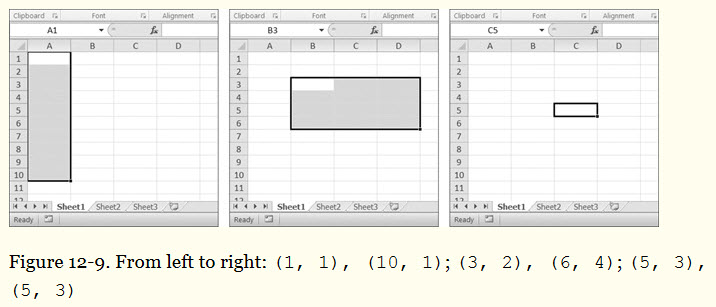

In [28]:
from IPython.display import Image
Image("ch12_snapshot_5.jpg")

In [30]:
wb = openpyxl.Workbook() # creating a new workbook
sheet = wb.active
for i in range(1, 11): # create some data in column A
    sheet['A' + str(i)] = i
refObj = openpyxl.chart.Reference(sheet, min_col=1, min_row=1, max_col=1, max_row=10)
seriesObj = openpyxl.chart.Series(refObj, title='First series')
chartObj = openpyxl.chart.BarChart()
chartObj.title = 'My Chart'
chartObj.append(seriesObj)
sheet.add_chart(chartObj, 'C5')
wb.save('sampleChart_ch12.xlsx')

Using the code above, we’ve created a bar chart by calling openpyxl.chart.BarChart(). we can also create line charts, scatter charts, and pie charts by calling openpyxl.chart.LineChart(), openpyxl.chart.ScatterChart(), and openpyxl.chart.PieChart() etc. 

The result of the code from above looks like this:

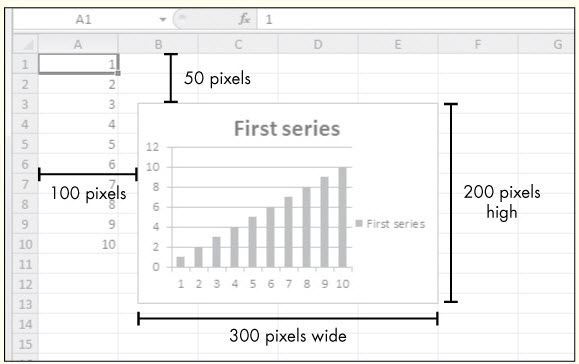

In [32]:
from IPython.display import Image
Image("ch12_snapshot_6.jpg")